In [1]:
import pandas as pd
import string
import re
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
import math
from matplotlib import pyplot as plt

In [2]:
df=pd.DataFrame()
df['date_num']=list(range(19358, 19723))
df['date']=pd.date_range('2023-01-01', '2023-12-31')
df=df.set_index('date_num')
df['num_posts']=0
df['num_c_with']=0
df['num_c']=0

In [3]:
def work_with_comments(comments):
    comments['clean_text']=''
    comments['keyword_i']=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'инфляц|цен', s))*bool(re.search(r'выс|выш|рост|раст', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
    return comments

In [4]:
def work_with_df(posts, comments_res, df):
    i=0
    for i in range(len(posts)):
        df.loc[posts['post_time'][i]//86400, 'num_posts']=df['num_posts'][posts['post_time'][i]//86400]+1
    i=0
    for i in range(len(comments)):
        df.loc[comments['comment_time'][i]//86400, 'num_c_with']=df['num_c_with'][comments['comment_time'][i]//86400]+comments['keyword_i'][i]
        df.loc[comments['comment_time'][i]//86400, 'num_c']=df['num_c'][comments['comment_time'][i]//86400]+1
    return df

# Коммерсант

In [5]:
comments=pd.read_csv('commersant_comments2.csv')
posts=pd.read_csv('commersant_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,14
19359,2023-01-02,2,0,39
19360,2023-01-03,1,1,17
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,1
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,1,0,1
19720,2023-12-29,0,0,2


# Ведомости

In [6]:
comments=pd.read_csv('vedomosti_comments2.csv')
posts=pd.read_csv('vedomosti_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,14
19359,2023-01-02,2,0,41
19360,2023-01-03,1,1,19
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,2,0,1
19720,2023-12-29,1,0,3


# Эксперт

In [7]:
comments=pd.read_csv('expert_ru_comments2.csv')
posts=pd.read_csv('expert_ru_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,14
19359,2023-01-02,2,0,41
19360,2023-01-03,1,1,19
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,3,0,1
19720,2023-12-29,2,0,3


# ТАСС

In [8]:
comments=pd.read_csv('tassagency_comments2.csv')
posts=pd.read_csv('tassagency_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,1,2,14
19359,2023-01-02,2,0,41
19360,2023-01-03,1,1,19
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,3,0,1
19720,2023-12-29,2,0,3


# Московский комсомолец

In [9]:
comments=pd.read_csv('mk_ru_comments2.csv')
posts=pd.read_csv('mk_ru_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,2,0,41
19360,2023-01-03,1,1,19
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,3,0,1
19720,2023-12-29,5,1,12


# Комсомольская правда

In [10]:
comments=pd.read_csv('kpru_comments2.csv')
posts=pd.read_csv('kpru_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,2,0,41
19360,2023-01-03,1,1,19
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,0,0,0
19719,2023-12-28,4,3,10
19720,2023-12-29,6,2,21


# Аргументы и факты

In [11]:
comments=pd.read_csv('aif_ru2_comments.csv')
posts=pd.read_csv('aif_ru2_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,4,1,57
19360,2023-01-03,1,1,21
19361,2023-01-04,1,0,2
19362,2023-01-05,0,0,4
...,...,...,...,...
19718,2023-12-27,2,2,29
19719,2023-12-28,4,3,10
19720,2023-12-29,7,2,23


# Известия

In [12]:
comments=pd.read_csv('izvestia_comments2.csv')
posts=pd.read_csv('izvestia_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,5,1,69
19360,2023-01-03,3,2,32
19361,2023-01-04,3,0,10
19362,2023-01-05,1,0,9
...,...,...,...,...
19718,2023-12-27,3,2,40
19719,2023-12-28,4,3,10
19720,2023-12-29,7,2,23


# Вести

In [13]:
comments=pd.read_csv('vesti_comments2.csv')
posts=pd.read_csv('vesti_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,5,1,69
19360,2023-01-03,3,2,32
19361,2023-01-04,3,0,10
19362,2023-01-05,1,0,9
...,...,...,...,...
19718,2023-12-27,3,2,40
19719,2023-12-28,4,3,10
19720,2023-12-29,7,2,23


# Life.ru

In [14]:
comments=pd.read_csv('life_comments2.csv')
posts=pd.read_csv('life_posts2.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
19358,2023-01-01,2,2,14
19359,2023-01-02,5,1,69
19360,2023-01-03,3,2,32
19361,2023-01-04,3,0,10
19362,2023-01-05,1,0,9
...,...,...,...,...
19718,2023-12-27,3,2,40
19719,2023-12-28,4,3,10
19720,2023-12-29,7,2,23


# Индикатор

In [15]:
df['indicator']=df['num_c_with']/df['num_posts']
df['date_num']=df.index
df=df.set_index('date')
df['date']=df.index
df

,num_posts,num_c_with,num_c,indicator,date_num,date
date,,,,,,
2023-01-01,2,2,14,1.000000,19358,2023-01-01
2023-01-02,5,1,69,0.200000,19359,2023-01-02
2023-01-03,3,2,32,0.666667,19360,2023-01-03
2023-01-04,3,0,10,0.000000,19361,2023-01-04
2023-01-05,1,0,9,0.000000,19362,2023-01-05
...,...,...,...,...,...,...
2023-12-27,3,2,40,0.666667,19718,2023-12-27
2023-12-28,4,3,10,0.750000,19719,2023-12-28
2023-12-29,7,2,23,0.285714,19720,2023-12-29


In [16]:
df.to_csv('infl_indicator2.csv', index=False)

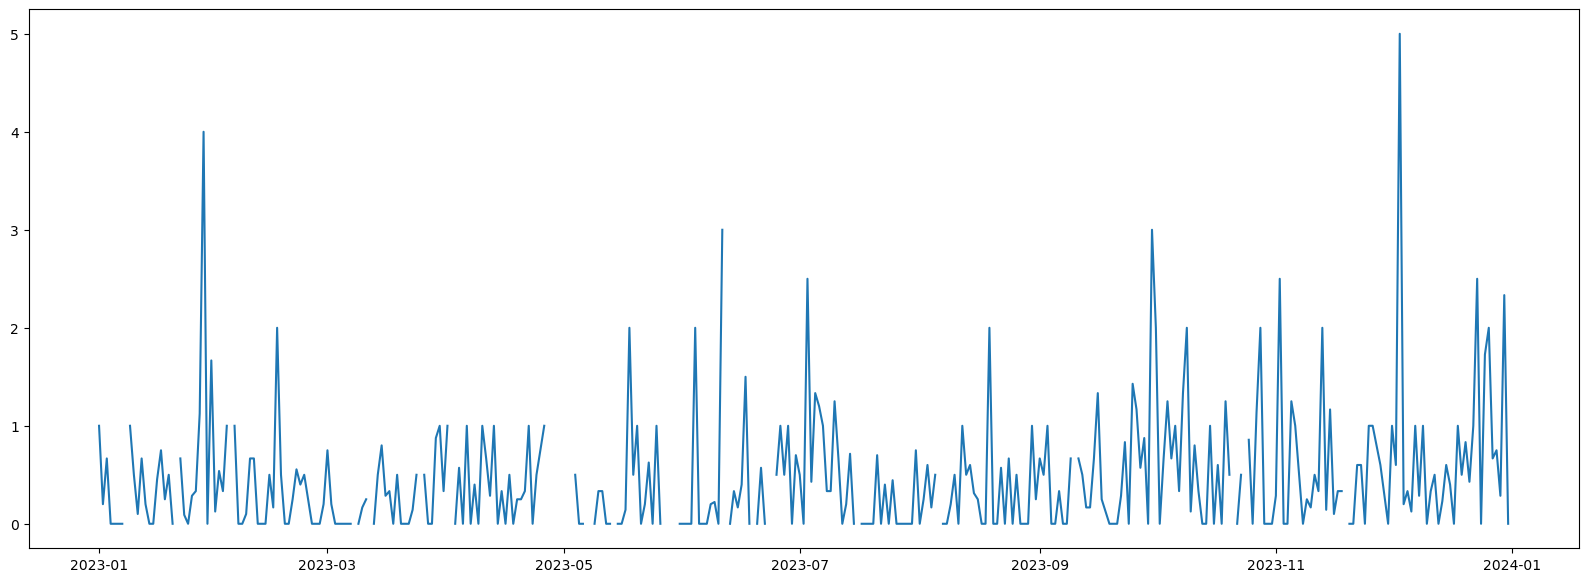

In [18]:
plt.figure(figsize=(20, 7))
plt.plot(df['indicator'])

# Ежемесячная частота

In [19]:
df_month=pd.DataFrame()
df_month['date']=['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
df_month['sum_i']=0
df_month['n']=0
df_month=df_month.set_index('date')
df_month['date']=df_month.index
df_month

,sum_i,n,date
date,,,
2023-01,0,0,2023-01
2023-02,0,0,2023-02
2023-03,0,0,2023-03
2023-04,0,0,2023-04
2023-05,0,0,2023-05
2023-06,0,0,2023-06
2023-07,0,0,2023-07
2023-08,0,0,2023-08
2023-09,0,0,2023-09


In [21]:
i=0
for i in range (len(df)):
    if math.isnan(df['indicator'][i])==False and math.isinf(df['indicator'][i])==False:
        df_month.loc[str(df['date'][i])[:7],'sum_i']=df_month['sum_i'][str(df['date'][i])[:7]]+df['indicator'][i]
        df_month.loc[str(df['date'][i])[:7],'n']=df_month['n'][str(df['date'][i])[:7]]+1

In [22]:
df_month

,sum_i,n,date
date,,,
2023-01,14.581169,29,2023-01
2023-02,9.627350,27,2023-02
2023-03,7.136905,28,2023-03
2023-04,10.840476,26,2023-04
2023-05,7.034524,23,2023-05
2023-06,12.093651,26,2023-06
2023-07,12.753968,30,2023-07
2023-08,9.867262,30,2023-08
2023-09,15.202381,29,2023-09


In [23]:
df_month['indicator']=df_month['sum_i']/df_month['n']
df_month

,sum_i,n,date,indicator
date,,,,
2023-01,14.581169,29,2023-01,0.502799
2023-02,9.627350,27,2023-02,0.356569
2023-03,7.136905,28,2023-03,0.254889
2023-04,10.840476,26,2023-04,0.416941
2023-05,7.034524,23,2023-05,0.305849
2023-06,12.093651,26,2023-06,0.465140
2023-07,12.753968,30,2023-07,0.425132
2023-08,9.867262,30,2023-08,0.328909
2023-09,15.202381,29,2023-09,0.524220


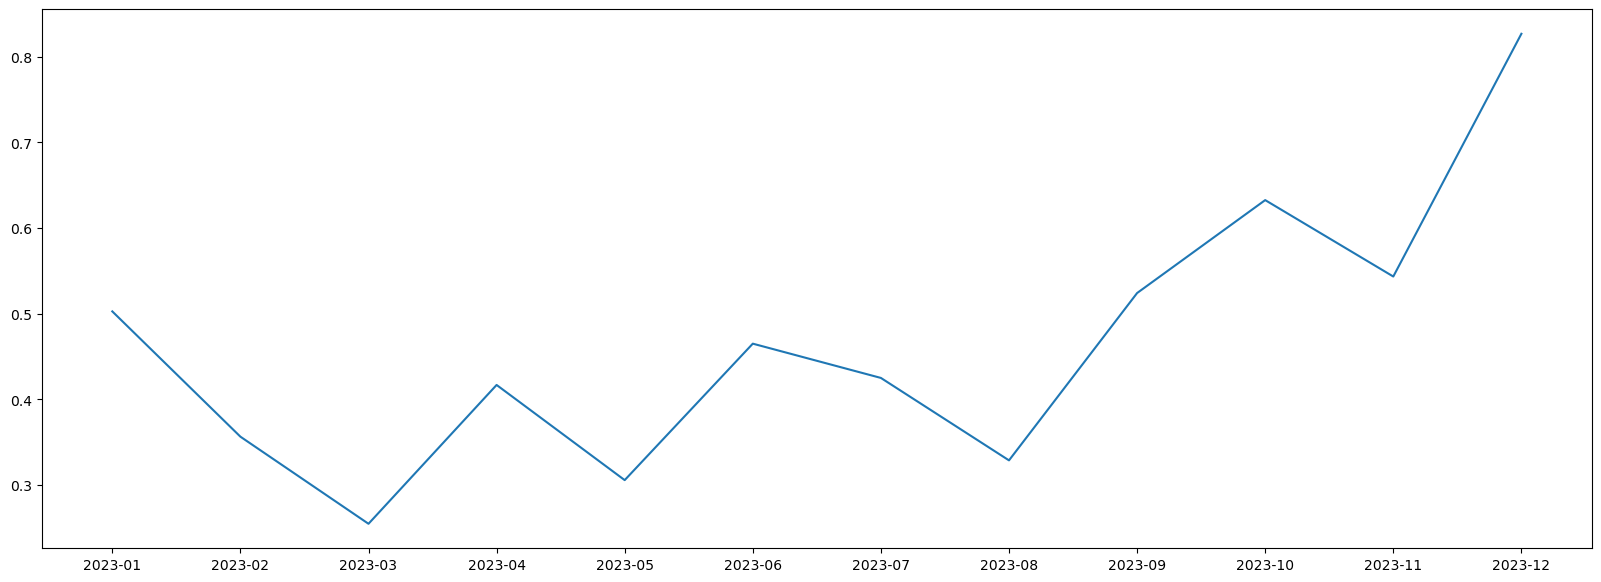

In [24]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['indicator'])

In [25]:
df_month.to_csv('month_infl_indicator2.csv', index=False)